In [21]:
import numpy as np
from glob import glob
D = 0.15

In [22]:
graph_paths = glob("Project3 Dataset/graph_*.txt")
graphs = []
for graph_path in graph_paths:
    with open(graph_path , "r") as f:
        edges = []
        edge = f.readline()
        while edge:
            v1 , v2 = edge.split(",")
            v1,v2 = int(v1), int(v2)
            edges.append([v1,v2])
            edge = f.readline()
        m = np.amax(edges)
    adj_matrix = np.zeros([m,m])
    for edge in edges:
        v1,v2 = edge
        adj_matrix[v1-1][v2-1] = 1
    
    graphs.append(adj_matrix)
with open("Project3 Dataset\ibm-5000.txt") as f:
    

In [24]:
#PAGERANK
Bs = []
for graph in graphs:
    B = np.array(np.zeros([len(graph),len(graph)]))
    count = 0
    for r in graph:
        oD = np.sum(r)
        if oD != 0:
            rp_row = graph[count]/oD
        B[count] = graph[count]
        count += 1
    #print(B)
    Bs.append(B.T)

In [25]:
Rps = []

for B in Bs:
    Rp = np.ones([len(B),1]) / len(B)
    for _ in range(30):
        Rp = (B @ Rp) * (1-D) + D/ len(B)
        Rp = Rp / np.linalg.norm(Rp)
        Rp = Rp / np.sum(Rp)
    Rps.append(Rp)


In [26]:
count = 1
for Rp in Rps:
    print(Rp)
    with open("result/graph_{}/graph_{}_PageRank.txt".format(count,count),'w') as f: 
        #f.writelines("PageRank:\n")
        np.savetxt(f,Rp.T,fmt="%.3f")
    count+=1

[[0.03480463]
 [0.07599084]
 [0.12472876]
 [0.18240339]
 [0.25065388]
 [0.33141851]]
[[0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]]
[[0.1953155]
 [0.3046845]
 [0.3046845]
 [0.1953155]]
[[0.20412531]
 [0.17928681]
 [0.17631424]
 [0.13223731]
 [0.16739607]
 [0.06419889]
 [0.07644137]]
[[7.34533327e-05]
 [7.34533327e-05]
 [7.34533327e-05]
 [7.34533327e-05]
 [7.34533327e-05]
 [8.77933292e-05]
 [8.77933292e-05]
 [8.77933292e-05]
 [8.77933292e-05]
 [8.77933292e-05]
 [8.77933292e-05]
 [8.77933292e-05]
 [8.77933292e-05]
 [8.77933292e-05]
 [8.77933292e-05]
 [9.17258539e-05]
 [9.11397872e-05]
 [1.30138701e-04]
 [9.63022240e-05]
 [1.25690730e-04]
 [2.61900650e-02]
 [2.61900650e-02]
 [1.25690730e-04]
 [3.75871209e-02]
 [1.11866179e-04]
 [9.05930951e-05]
 [9.39395530e-05]
 [9.11397872e-05]
 [9.11397872e-05]
 [9.91273560e-05]
 [9.41832411e-05]
 [9.11397872e-05]
 [1.05146907e-04]
 [9.79394686e-05]
 [2.61323954e-02]
 [1.35873304e-04]
 [9.35936583e-05]
 [1.03158627e-04]
 [1.25690730e-04]
 [6.58623774e-04]
 [9.113

In [33]:
#HITS
count = 1
for graph in graphs:
    h = np.ones(len(graph))
    a = np.ones(len(graph))
    #iter
    while True:
        next_h = graph @ a
        next_h = next_h / np.linalg.norm(next_h)
        if all(h) == all(next_h):
            h = next_h
            break
        h = next_h
        next_a = graph.T @ h
        next_a = next_a/ np.linalg.norm(next_a)
        if all(a) == all(next_a):
            a = next_a
            break
        a = next_a
    with open("result/graph_{}/graph_{}_HITS_authority.txt".format(count,count),'w') as f: 
        #f.writelines("Authority:\n")
        np.savetxt(f,a,fmt="%.3f",newline=" ")
    with open("result/graph_{}/graph_{}_HITS_hub.txt".format(count,count),'w') as f: 
        #f.writelines("Hub:\n")
        np.savetxt(f,h,fmt="%.3f",newline=" ")
    count += 1

In [32]:
#SIMRANK
C = 0.9
count = 1
for graph in graphs:
    I = np.identity(len(graph))
    S = np.identity(len(graph))
    graph_norm = []
    #adj_matrix normalize
    for i in range(len(graph)):
        if np.sum(graph[i]) != 0:
            graph_norm.append(graph[i] / np.sum(graph[i]))
        else:
            graph_norm.append(graph[i])
    P = graph_norm = np.array(graph_norm)
    for _ in range(30):
        #矩陣形式算SimRank ref=
        new_S = C * (P.T @ S @ P)
        new_S = new_S + I - np.diag(np.diag(new_S))
    print(new_S)
    with open("result/graph_{}/graph_{}_SimRank.txt".format(count,count),'w') as f: 
        #f.writelines("Hub:\n")
        np.savetxt(f,new_S,fmt="%3f")
    count += 1
    

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
[[1.    0.    0.225 0.   ]
 [0.    1.    0.    0.225]
 [0.225 0.    1.    0.   ]
 [0.    0.225 0.    1.   ]]
[[1.      0.225   0.05625 0.05625 0.225   0.05625 0.     ]
 [0.225   1.      0.136   0.036   0.136   0.      0.036  ]
 [0.05625 0.136   1.      0.09225 0.136   0.05625 0.036  ]
 [0.05625 0.036   0.09225 1.      0.036   0.05625 0.036  ]
 [0.225   0.136   0.136   0.036   1.      0.      0.036  ]
 [0.05625 0.      0.05625 0.05625 0.      1.      0.     ]
 [0.      0.036   0.036   0.036   0.036   0.      1.     ]]
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.    

graph: h, a
 {1: 0.7113935437831613, 2: 0.5167135295109632, 3: 0.9889649625354783, 4: -0.9129292714374365, 5: -0.3041427643921663, 6: -0.0} 
 {1: -0.0, 2: 0.7113935437831613, 3: 0.5167135295109632, 4: 0.9889649625354783, 5: -0.9129292714374365, 6: -0.3041427643921663}


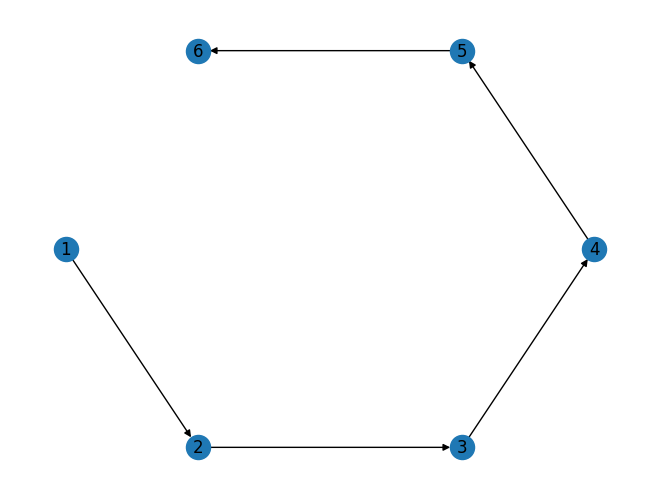

graph: h, a
 {1: 0.2071279009379849, 2: -0.42849397260836375, 3: 0.11140816772949101, 4: 0.8170858048788728, 5: 0.292872099062015} 
 {1: 0.292872099062015, 2: 0.2071279009379849, 3: -0.42849397260836375, 4: 0.11140816772949101, 5: 0.8170858048788728}


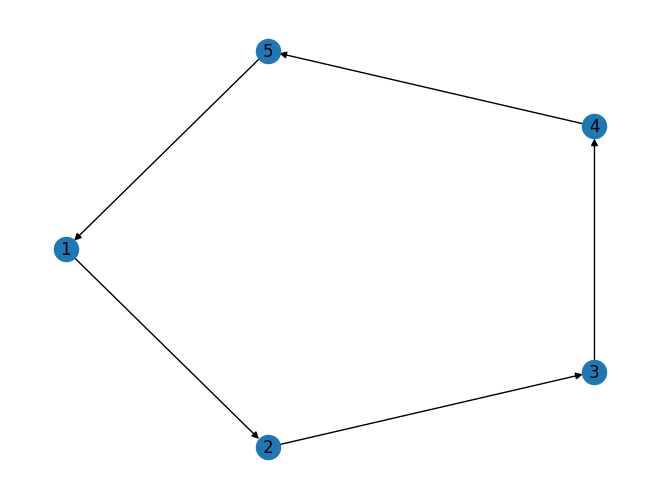

graph: h, a
 {1: -4.899945959485349, 2: 8.546313094234904, 3: -7.928279105485008, 4: 5.281911970735454} 
 {1: 5.281911970735453, 2: -7.928279105485008, 3: 8.546313094234902, 4: -4.899945959485348}


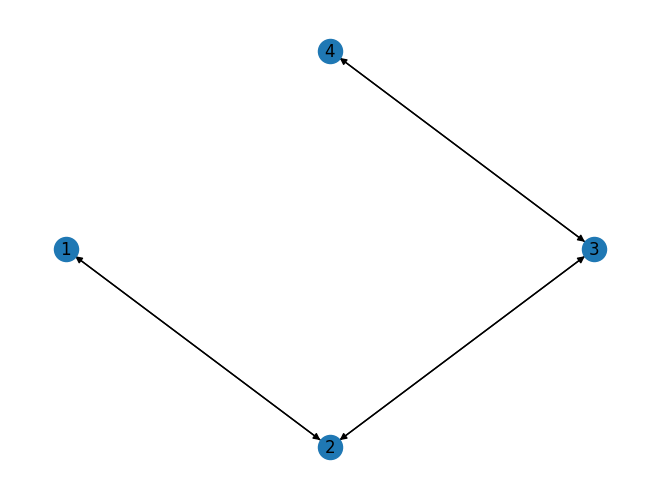

graph: h, a
 {1: 0.2754531769299127, 2: 0.04776230612668424, 3: 0.10868323956444088, 4: 0.19865955678939376, 5: 0.18373459903205103, 7: 0.06897240771541654, 6: 0.11673471384210078} 
 {1: 0.13948389234726463, 2: 0.1779120316926966, 3: 0.20082320551043412, 4: 0.1401777532702147, 5: 0.2014253639091753, 7: 0.08408849166833329, 6: 0.05608926160188137}


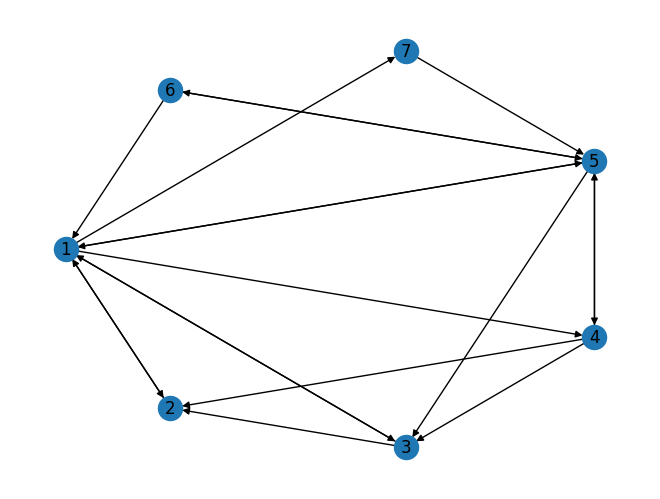

graph: h, a
 {1: 1.1677961055967302e-18, 8: 0.0, 11: 6.638415919175392e-19, 168: 0.0, 227: 5.837406036266839e-19, 253: 1.5450398808742876e-18, 264: 6.229035697116311e-18, 307: -3.04264157620158e-19, 2: 4.0489091046359914e-19, 9: 0.0, 10: 0.0, 13: 9.809986349426372e-20, 14: 0.0, 3: -2.2139988564807656e-19, 6: -2.3679516397606415e-19, 219: -5.963207241675992e-20, 223: -8.590617816899713e-20, 235: -1.826791046706027e-19, 296: 0.0, 336: 0.0, 4: 6.165399684430338e-18, 40: 0.0, 136: 0.0, 217: 0.0, 265: 2.168423530304396e-18, 287: 0.0, 300: 2.6400815262329956e-18, 344: 3.2288268368850004e-18, 351: 3.717263712356101e-18, 363: 5.8493914355907915e-18, 454: 2.2510859505422563e-18, 457: 0.0, 5: 7.282783244176356e-18, 7: 5.332302589865622e-18, 12: 6.543829584529028e-18, 15: 0.0, 46: 0.0, 187: 0.0, 191: 0.0, 244: 0.0, 306: 6.817692686197857e-18, 436: 0.0, 444: 0.0, 26: 0.0, 448: -8.974599907086897e-19, 124: -1.5623646460481879e-19, 143: 9.021899987592174e-20, 256: 0.0, 258: 3.655407730370586e-18, 38

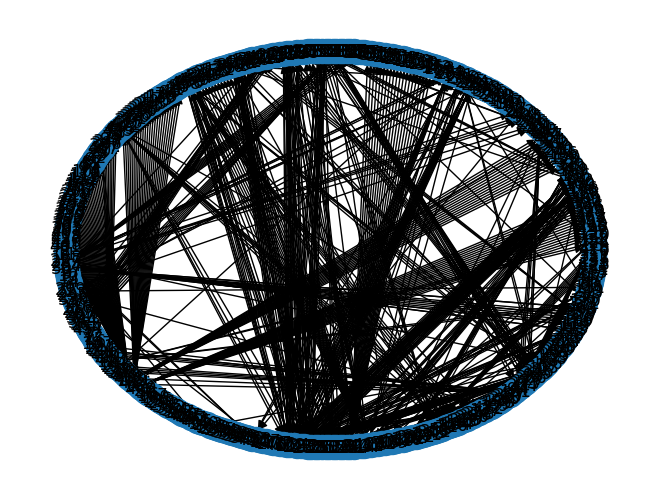

graph: h, a
 {1: 0.0026916826106009382, 6: -0.0, 68: 0.004045746072871514, 95: 0.0038376192515291807, 142: -0.0, 273: 0.0038878241712929883, 298: -0.0, 367: -0.0, 374: -0.0, 387: 0.0031759612996312275, 410: -1.263376371870939e-18, 415: -0.0, 554: 0.0036349149704458378, 578: 0.0036470009432314487, 635: -0.0, 725: -0.0, 747: -0.0, 748: 0.004189549696722387, 848: 0.004042156401154415, 856: -0.0, 897: 0.004118408676949752, 946: 0.004092802045945905, 951: -0.0, 955: 0.004072208429404043, 1021: -0.0, 1058: 0.0037684216411335296, 1084: 0.003967043117375062, 7: 0.009848764997375185, 62: 0.009019280367763454, 78: 0.010018191760859744, 180: 0.011559566656523423, 225: -0.0, 370: -0.0, 394: -0.0, 397: 0.012518885502196337, 501: 0.01387562382805293, 528: -0.0, 609: -0.0, 761: -0.0, 763: -0.0, 1003: 0.002941377557440464, 1089: -0.0, 1121: 1.4102650841260534e-05, 1123: -0.0, 1151: -0.0, 1227: 0.009735760413355584, 8: 0.014477549648701987, 79: 0.01524883927467842, 134: 0.010117415795254204, 139: -0.0,

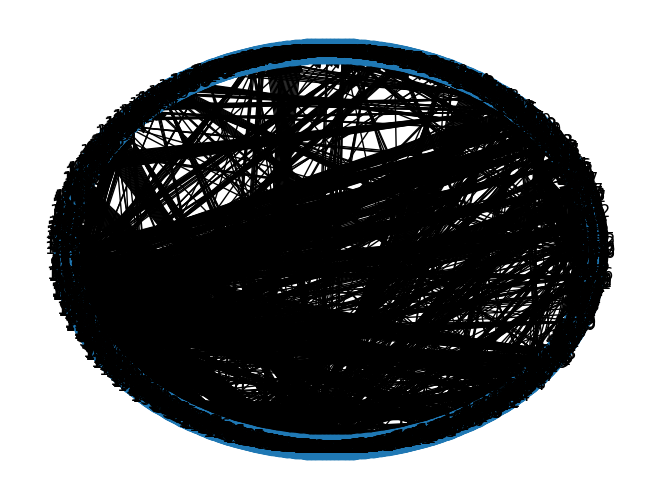